In [3]:
!pip install tweepy
!pip install textblob


     |████████████████████████████████| 645kB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 33.9MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [7]:
import tweepy as tw
from textblob import TextBlob
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd





consumer_key = 'hxs9wQkidefoM1l7vtnAAEOyw'
consumer_secret = 'dF6o2xly5MlMRFFEYwRnzJ75Hjz0YqtA7DcsENJyJJB0ZOpcGo'
access_token = '2176453907-KgmXS3aAD2ev26noH6AP5beXfqYiZMkoCdllL23'
access_token_secret = 'WXpIYVtfeQtXe23OCoj0n3nFu41uq9HD07ELUuBPVLnUB'

auth = tw.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

Please Enter Your Companies Name or Product: amazon
Enter the amount of tweets you want to analyze: 90
How People are recting on amazon by analyzing 90tweets.
There is a Positive polarity


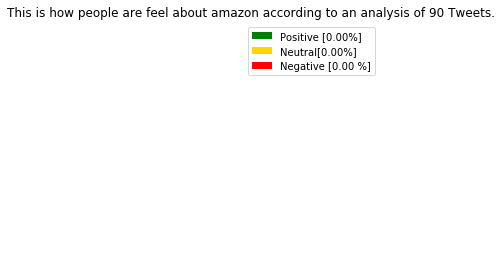

In [13]:
searchTerm = input("Please Enter Your Companies Name or Product: ")
numberofsearchterms = int(input("Enter the amount of tweets you want to analyze: "))

tweets = tw.Cursor(api.search, q= searchTerm, lang="English").items(numberofsearchterms)


#store the polarity, to find the average of positive, negative, and netural tweets 
positive = 0
negative = 0 
neutral = 0
# the average result of tweets searched
polarity= 0

def percentage(part,whole):
    return 100* float(part)/float(whole)
for tweet in tweets:
    analysis= TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity < 0.00):
        negative+= 1
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1


positive = percentage(postive, numberofsearchterms)
negative= percentage(negative, numberofsearchterms)
neutral = percentage(neutral, numberofsearchterms)

positive = format(positive, '.2f')
neutral = format(neutral, '.2f')
negative = format(negative, '.2f')

print("How People are recting on "+ searchTerm + " by analyzing " + str(numberofsearchterms) + "tweets.")

if (polarity == 0):
    print("There is a Neutral polarity")
elif (polarity > 0.00):
    print("There is a Positive polarity")
elif (polarity < 0.00):
    print("There is a Negative Polarity Negative")


labels = ['Positive ['+str(positive)+ '%]', 'Neutral['+str(neutral)+ '%]', 'Negative ['+str(negative) +' %]']
sizes = [positive, neutral, negative]
colors = ['green','gold','red']
patches, texts = plt.pie(sizes, colors= colors, startangle= 90)
plt.legend(patches, labels, loc="best")
plt.title("This is how people are feel about " + searchTerm + " according to an analysis of " + str(numberofsearchterms) + " Tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()